In [1]:
import pandas as pd
import logging
import torch
import pytorch_lightning as pl
from pathlib import Path
from torch.utils.data import DataLoader
import seisbench
import seisbench.models as sbm
from seisLM.evaluation import pick_eval

from seisLM.model import supervised_models


In [2]:
model_name = 'PhaseNet'
data_name = 'ethz'

pick_eval.save_pick_predictions(
  data_name=data_name,
  model_name=model_name,
  targets=f'/home/liu0003/Desktop/projects/seisLM/targets/{data_name}',
  sets='dev,test',
)

2024-05-31 19:40:29,415 | seisbench | WARNING | Check available storage and memory before downloading and general use of ETHZ dataset. Dataset size: waveforms.hdf5 ~22Gb, metadata.csv ~13Mb


Model trained on ETHZ for 100 epochs with a learning rate of 0.01.
Threshold selected for optimal F1 score on in-domain evaluation. Depending on the target region, the thresholds might need to be adjusted.
When using this model, please reference the SeisBench publications listed at https://github.com/seisbench/seisbench

Jannes Münchmeyer, Jack Woollam (munchmej@gfz-potsdam.de, jack.woollam@kit.edu)


Preloading waveforms: 100%|██████████| 3632/3632 [00:00<00:00, 3786.94it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


saved to /home/liu0003/Desktop/projects/seisLM/evaluation_results/PhaseNet_ethz/dev_task1.csv


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,


saved to /home/liu0003/Desktop/projects/seisLM/evaluation_results/PhaseNet_ethz/dev_task23.csv


Preloading waveforms: 100%|██████████| 10485/10485 [00:02<00:00, 3779.88it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


saved to /home/liu0003/Desktop/projects/seisLM/evaluation_results/PhaseNet_ethz/test_task1.csv


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv1d(input, weight, bias, self.stride,


saved to /home/liu0003/Desktop/projects/seisLM/evaluation_results/PhaseNet_ethz/test_task23.csv


In [3]:
from seisLM.utils.project_path import gitdir
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt


task = 1 # '23'
eval_set = 'dev' #'test'

pred_path = (
  Path(gitdir())
  / "evaluation_results"
  / f"{model_name}_{data_name}"
  / f"{eval_set}_task{task}.csv"
)


Text(0, 0.5, 'true positive rate')

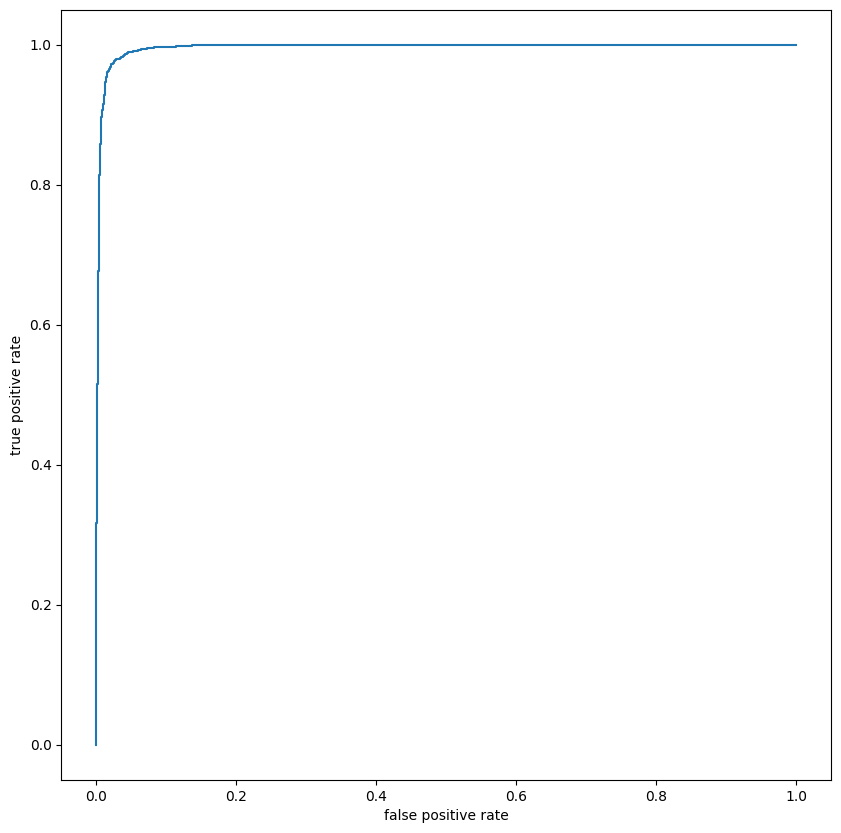

In [4]:

pred = pd.read_csv(pred_path)

pred["trace_type_bin"] = pred["trace_type"] == "earthquake"

fpr, tpr, _ = roc_curve(pred["trace_type_bin"], pred["score_detection"])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(fpr, tpr)
ax.set_aspect("equal")

ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")



phase P: MAE 0.08992850213431307
phase S: MAE 0.11450471614132407


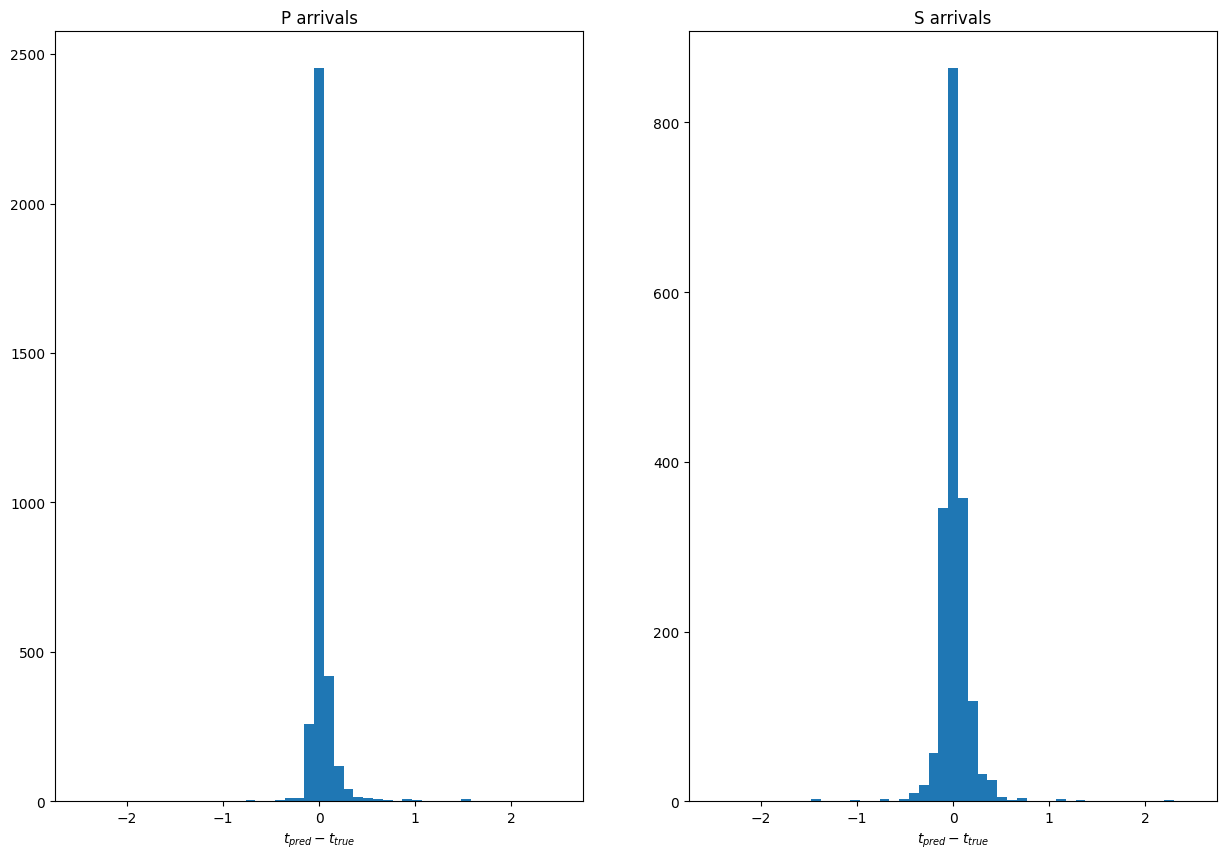

In [7]:
import numpy as np

task = 23
eval_set = 'dev' #'test'

pred_path = (
  Path(gitdir())
  / "evaluation_results"
  / f"{model_name}_{data_name}"
  / f"{eval_set}_task{task}.csv"
)

pred = pd.read_csv(pred_path)


fig = plt.figure(figsize=(15, 10))
axs = fig.subplots(1, 2)

for i, phase in enumerate(["P", "S"]):
    ax = axs[i]
    ax.set_title(f"{phase} arrivals")
    pred_phase = pred[pred["phase_label"] == phase]
    pred_col = f"{phase.lower()}_sample_pred"

    diff = (pred_phase[pred_col] - pred_phase["phase_onset"]) / pred_phase["sampling_rate"]

    print(f'phase {phase}: MAE {diff.abs().mean()}')
    bins = np.linspace(-2.5, 2.5, 50)
    ax.hist(diff, bins=bins)
    ax.set_xlabel("$t_{pred} - t_{true}$")
